In [1]:
from tensorflow.keras.layers import Input, Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224,224]
train_path = r'C:\Users\asus\Desktop\Cotton_diseases\train'
valid_path = r'C:\Users\asus\Desktop\Cotton_diseases\test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 44s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob(r'C:\Users\asus\Desktop\Cotton_diseases\train\*')   # useful gor getting number of output classes

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders),activation = 'softmax')(x)

In [9]:
model = Model(inputs = inception.input,outputs = prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy']
             )

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r'C:\Users\asus\Desktop\Cotton_diseases\train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r'C:\Users\asus\Desktop\Cotton_diseases\test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical') 

Found 18 images belonging to 4 classes.


In [15]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
) 

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 300s 5s/step - loss: 5.1759 - accuracy: 0.5862 - val_loss: 0.2209 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 303s 5s/step - loss: 0.6375 - accuracy: 0.8800 - val_loss: 0.3098 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 288s 5s/step - loss: 0.3855 - accuracy: 0.9174 - val_loss: 0.3912 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 268s 4s/step - loss: 0.5388 - accuracy: 0.9023 - val_loss: 0.3582 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 269s 4s/step - loss: 0.5372 - accuracy: 0.9194 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 281s 5s/step - loss: 0.5595 - accuracy: 0.9188 - val_loss: 0.2357 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 288s 5s/step - loss: 0.3691 - accuracy: 0.9504 - val_loss: 0.7735 - val_accuracy: 0.9444
Epoch 8/20
61

In [16]:
import matplotlib.pyplot as plt

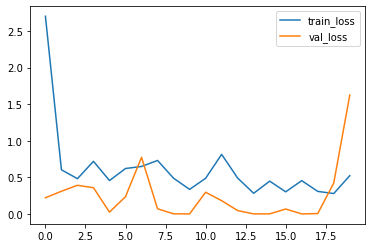

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

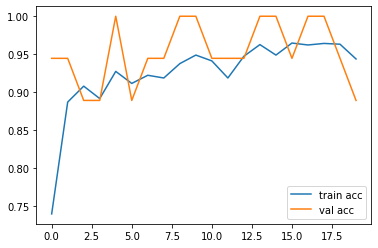

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_inception.h6')

INFO:tensorflow:Assets written to: model_inception.h6\assets


In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.00000000e+00, 2.45361855e-15, 4.02586439e-35, 1.28478125e-28],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.87318446e-23, 1.00000000e+00, 4.36817330e-25, 8.98551079e-16],
       [4.11537853e-36, 1.95371643e-33, 1.36814697e-38, 1.00000000e+00],
       [3.90167907e-06, 1.78045838e-13, 9.99996066e-01, 3.24701439e-08],
       [1.00000000e+00, 2.61201953e-25, 1.37364253e-09, 3.57135155e-25],
       [3.90417654e-08, 6.97852105e-22, 1.00000000e+00, 2.44264987e-19],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.17402687e-33],
       [9.42408790e-11, 9.99853015e-01, 1.34538431e-20, 1.47012732e-04],
       [8.63196505e-29, 1.71730120e-04, 0.00000000e+00, 9.99828219e-01],
       [7.81613937e-22, 2.10401975e-17, 1.06870805e-18, 1.00000000e+00],
       [3.03738358e-22, 3.03978576e-09, 6.13992629e-28, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61864105e-29, 1.00000000e+00, 9.91984573e

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([0, 1, 1, 3, 2, 0, 2, 0, 1, 3, 3, 3, 1, 1, 1, 2, 0, 2], dtype=int64)